# Introduction

Our business problem began by identifying the most common products bought together and for that we did several recommendation systems.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
try:
    df = pd.read_csv('orders.csv')
except:
    df = pd.read_csv('orders.xlsx')
df.drop(columns="Unnamed: 0", axis =1, inplace=True)
df.head()

,client,delivery_place,date,product,product_description,measure,quantity,is_internal_client,warehouse_zone,product_type,product_subtype,order_id,alley,alleycell
0,1128254,6346669,2023-01-06,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,600.0,Não,AMB,Bebidas,Aguas Minerais,1,AMB-01,AMB-01-02
1,1001096,6001131,2023-01-03,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,120.0,Não,AMB,Bebidas,Aguas Minerais,2,AMB-01,AMB-01-02
2,1001096,6001131,2023-01-17,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,120.0,Não,AMB,Bebidas,Aguas Minerais,3,AMB-01,AMB-01-02
3,1121833,6358142,2023-01-04,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,12.0,Não,AMB,Bebidas,Aguas Minerais,4,AMB-01,AMB-01-02
4,1122758,6328488,2023-01-04,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,60.0,Não,AMB,Bebidas,Aguas Minerais,5,AMB-01,AMB-01-02


How the company works is that for every deivery place in a day a truck takes the products, there can be more than one delivery place per day, as well several clients can have the same delivery place

In [2]:
#Implementing a orders Id
#order = df.groupby(['date','delivery_place']).size().reset_index()
#order['order_id'] = [i+1 for i in range(len(order))]
#order = order.drop(0,axis=1)
#data=df.merge(order, on=['date','delivery_place'])
#data.head()

In [3]:
#make groupby to get indexes product_tyoe and subtype
#analise = df.groupby(['warehouse_zone','product_type','product_subtype'])['quantity'].sum().reset_index()
#analise2 = df.groupby(['warehouse_zone','product_type',])['quantity'].sum().reset_index()

#Create Id's 
#analise['cellule'] = (analise.groupby('product_type').cumcount()+1).apply(lambda x: str(x).zfill(2))
#analise2['ID'] = (analise2.groupby('warehouse_zone').cumcount()+1).apply(lambda x: str(x).zfill(2))
#analise2['alley']= analise2.apply(lambda row: row['warehouse_zone'] +'-'+ str(row['ID']), axis=1)

#Drop unecessary columns
#analise2=analise2.drop(['quantity','ID'], axis=1)
#analise=analise.drop(['quantity'],axis=1)

#Merge everything together on a dataframe
#df_locations = df.merge(analise2, on=['warehouse_zone','product_type'], how='left')
#df = df_locations.merge(analise, on=['warehouse_zone','product_type','product_subtype'], how='left')
#df['alleycell'] = df.apply(lambda row: row['alley'] +'-'+ str(row['cellule']), axis=1)


In [4]:
df.head()

,client,delivery_place,date,product,product_description,measure,quantity,is_internal_client,warehouse_zone,product_type,product_subtype,order_id,alley,alleycell
0,1128254,6346669,2023-01-06,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,600.0,Não,AMB,Bebidas,Aguas Minerais,1,AMB-01,AMB-01-02
1,1001096,6001131,2023-01-03,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,120.0,Não,AMB,Bebidas,Aguas Minerais,2,AMB-01,AMB-01-02
2,1001096,6001131,2023-01-17,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,120.0,Não,AMB,Bebidas,Aguas Minerais,3,AMB-01,AMB-01-02
3,1121833,6358142,2023-01-04,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,12.0,Não,AMB,Bebidas,Aguas Minerais,4,AMB-01,AMB-01-02
4,1122758,6328488,2023-01-04,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,60.0,Não,AMB,Bebidas,Aguas Minerais,5,AMB-01,AMB-01-02


In [118]:
try:
    coords = pd.read_csv("coords.xls", delimiter=';')
except:
    coords = pd.read_csv("coords.csv", delimiter=';')
coords['x'] = coords['x'].str.replace(',', '.').astype(float)
coords['y'] = coords['y'].str.replace(',', '.').astype(float)

gg = df.groupby(['warehouse_zone','product_type','alley']).size().reset_index()
s= coords.merge(gg, on=['warehouse_zone','product_type'], how='left')
s= s.drop(0,axis=1)
s.loc[len(s)] = ['START',"START", 15, 1,"START"]
s.head()

,warehouse_zone,product_type,x,y,alley
0,AMB,Bebidas,12.0,44.0,AMB-01
1,AMB,Carne de Bovino,12.0,42.0,AMB-02
2,AMB,Carne de Porco,12.0,40.0,AMB-03
3,AMB,Criacao,12.0,38.0,AMB-04
4,AMB,Equipamentos p/cozinhas,12.0,36.0,AMB-05


## Recommendation system

## Apriori

### Association Rules

With the order id in place we can now start building a recommendation system based on what items are frequently purchased together. This can be useful for suggesting related items to customers, as well as informing product placement and marketing strategies.

To do this, we use the Apriori algorithm to identify frequent itemsets - that is, sets of items that appear together in a minimum number of orders. From these itemsets, we can generate association rules that tell us which items tend to be purchased together.

The Apriori algorithm is a scalable and efficient way to mine large datasets for frequent itemsets and generate association rules. By using this approach, we can identify patterns and relationships in transactional data that can inform our recommendation system and ultimately help us make data-driven decisions about product recommendations, marketing strategies, and product placement.

In [6]:
%%time
from mlxtend.frequent_patterns import apriori, association_rules

# Filter for orders with more than one item
#data = df.groupby('order_id').filter(lambda x: len(x) > 1)

# Pivot data to create binary matrix
basket = pd.pivot_table(df, index='order_id', columns='product_subtype', values='quantity', aggfunc='sum', fill_value=0)

# Convert values to binary
basket[basket > 0] = 1

# Find frequent itemsets
freq_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

print(freq_itemsets.shape)
freq_itemsets.head(5)

C:\Users\berna\anaconda3\envs\testing\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


(4917, 2)
CPU times: total: 15.6 s
Wall time: 19.2 s


,support,itemsets
0,0.160559,(Acucar - Adocantes)
1,0.129870,(Aguas Minerais)
2,0.071750,(Aperitivos)
3,0.251854,(Arroz)
4,0.270113,(Azeites)


In the context of the Apriori algorithm, support refers to the frequency with which an itemset appears in the dataset. Specifically, the support of an itemset is defined as the proportion of transactions in the dataset that contain all the items in that itemset.

For example, in the table you provided, the first itemset (`ABOBORA`) has a support value of `0.062928`. This means that about `6.3%` of the transactions in the dataset contain the item `ABOBORA`. Similarly, the second itemset (`ACUCAR GRANULADO SACO PAPEL 1 KG RAR`) has a support value of `0.135336`, which means that about `13.5%` of the transactions in the dataset contain the item `ACUCAR GRANULADO SACO PAPEL 1 KG RAR`.

The support metric is important in the Apriori algorithm because it is used to identify frequent itemsets, which are then used to generate association rules. Specifically, itemsets with a support value above a given threshold (e.g., `0.05` or `0.1`) are considered frequent, and the algorithm generates association rules based on those itemsets.

In [7]:
# Generate association rules
rules_orig = association_rules(freq_itemsets, metric='lift', min_threshold=1)

# Sort rules by lift and support
rules_orig = rules_orig.sort_values(['lift', 'support'], ascending=[False, False])

# Print top 5 rules
print(rules_orig.shape)
rules_orig.head(5)

(113462, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3722,"(Utensilios Domesticos, Biosog)",(Sacos de Plastico),0.059663,0.094981,0.056834,0.952586,10.029237,0.051167,19.087675,0.957414
3723,(Sacos de Plastico),"(Utensilios Domesticos, Biosog)",0.094981,0.059663,0.056834,0.598375,10.029237,0.051167,2.341333,0.994776
3721,"(Sacos de Plastico, Biosog)",(Utensilios Domesticos),0.070036,0.082037,0.056834,0.811506,9.891972,0.051089,4.869974,0.966605
3724,(Utensilios Domesticos),"(Sacos de Plastico, Biosog)",0.082037,0.070036,0.056834,0.692790,9.891972,0.051089,3.027129,0.979242
3720,"(Utensilios Domesticos, Sacos de Plastico)",(Biosog),0.062192,0.101239,0.056834,0.913853,9.026712,0.050538,10.432821,0.948187


### Products likely to be bought in previous orders

In [8]:
%%time
#For every order lets compare the product_subtype with antecedents(all that exist) through a metric we choose the antecendent that's more similar with the original order then present for that order the consequents of the most probabily antecedents

# create a dictionary to store the consequents for each antecedent
consequent_dict = {}
for index, row in rules_orig.iterrows():
    antecedent = row['antecedents']
    consequent = row['consequents']
    if antecedent not in consequent_dict:
        consequent_dict[antecedent] = set(consequent)
    else:
        consequent_dict[antecedent].update(consequent)

# create a function to calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

# create a dictionary to store the most similar antecedent for each order
similar_antecedent_dict = {}
for order_id in df['order_id'].unique():
    order_subtypes = set(df.loc[df['order_id'] == order_id, 'product_subtype'])
    max_similarity = -np.inf
    for antecedent, consequents in consequent_dict.items():
        antecedent_subtypes = set(antecedent)
        similarity = jaccard_similarity(order_subtypes, antecedent_subtypes)
        if similarity > max_similarity:
            max_similarity = similarity
            max_antecedent = antecedent
    similar_antecedent_dict[order_id] = max_antecedent



CPU times: total: 2min 3s
Wall time: 2min 27s


This code aims to find the most similar antecedent for each order in the df_new DataFrame, based on the Jaccard similarity between the order's product subtypes and the antecedent's product subtypes in the association rules.

First, a dictionary named **consequent_dict** is created to store the consequents for each antecedent in the rules_orig DataFrame. The keys in the dictionary are the antecedents, and the values are sets of consequents.

Then, a function named **jaccard_similarity** is defined to calculate the Jaccard similarity between two sets.

Next, a dictionary named **similar_antecedent_dict** is created to store the most similar antecedent for each order. The code iterates over each unique order_id in df_new and extracts the product subtypes associated with that order. For each order, the code then iterates over each antecedent in consequent_dict and calculates the Jaccard similarity between the order's product subtypes and the antecedent's product subtypes. The antecedent with the highest similarity is stored in the max_antecedent variable, and the corresponding similarity value is stored in the max_similarity variable. Finally, the most similar antecedent for each order is stored in the similar_antecedent_dict dictionary.

In [147]:
%%time
# create a dictionary to store the consequents for each order
consequent_order_dict = {}
for order_id, antecedent in similar_antecedent_dict.items():
    consequents = consequent_dict[antecedent]
    consequent_order_dict[order_id] = consequents

consequent_order_df = pd.DataFrame(consequent_order_dict.items(), columns=['order_id', 'consequents'])

print(consequent_order_df.shape)
print(df.order_id.max())
print("CHECK!")
consequent_order_df.head(10)

(23331, 2)
23331
CHECK!
CPU times: total: 46.9 ms
Wall time: 106 ms


,order_id,consequents
0,1,"{Leite, Queijos, Horticolas Frescos, Refrigera..."
1,2,"{Leite, Queijos}"
2,3,"{Arroz, Peixe Congelado, Leite, Azeites, Horti..."
3,4,"{Leite, Peixe Congelado, Azeites, Horticolas F..."
4,5,"{Leite, Queijos, Horticolas Frescos, Refrigera..."
5,6,{Leite}
6,7,"{Leite, Queijos, Horticolas Frescos, Refrigera..."
7,8,{Arroz}
8,9,"{Leite, Massas Secas, Iogurtes, Azeites, Cebol..."
9,10,{Batata}


The code generates a dictionary consequent_order_dict which stores the best consequent products for each order, based on the antecedent with the highest Jaccard similarity to the order. Then it converts this dictionary to a DataFrame consequent_order_df with two columns, order_id and consequents, where each row represents an order and its corresponding best consequent products. The shape attribute of the DataFrame gives the number of rows (i.e., the number of orders) and columns. The df_new.order_id.max() gives the highest order ID in the original df_new DataFrame to ensure that the new DataFrame has the correct number of rows. Finally, the head() method displays the first five rows of the DataFrame.

In [148]:
rules_final=consequent_order_df.explode('consequents')
rules_final=rules_final.rename(columns={'consequents':'product_subtype'})
rules_final

,order_id,product_subtype
0,1,Leite
0,1,Queijos
0,1,Horticolas Frescos
0,1,Refrigerantes
0,1,Enchidos-Charcutaria Porco
...,...,...
23330,23331,Bovino Adulto Congelado (Nacional)
23330,23331,Criacao (Ovos)
23330,23331,Aguas Minerais
23330,23331,Criacao Congelada


In [149]:
df[df['order_id']==9]

,client,delivery_place,date,product,product_description,measure,quantity,is_internal_client,warehouse_zone,product_type,product_subtype,order_id,alley,alleycell
8,1007396,6306117,2023-01-05,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,60.0,Não,AMB,Bebidas,Aguas Minerais,9,AMB-01,AMB-01-02
239,1007396,6306117,2023-01-05,558440,COCA COLA LATA 0.33,UN,120.0,Não,AMB,Bebidas,Refrigerantes,9,AMB-01,AMB-01-08
10255,1007396,6306117,2023-01-05,559717,ERVILHAS CONG 2.5KG EUROCHEFE,KG,5.0,Não,CON,Legumes,Horticolas Congelados,9,CON-06,CON-06-11
18210,1007396,6306117,2023-01-05,120933,TOMATE PELADO INTEIRO LT 780 GR PL MIMO,UN,6.0,Não,AMB,Legumes,Horticolas Enlatados Importados,9,AMB-07,AMB-07-05
27602,1007396,6306117,2023-01-05,596887,OVOS TIPO M CX 15 DZ CLARA GEMA,DZ,15.0,Não,AMB,Criacao,Criacao (Ovos),9,AMB-04,AMB-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363891,1007396,6306117,2023-01-05,404130,RED FISH 500/700G CONG CX +/- 6 KG,KG,7.0,Não,CON,Peixe,Peixe Congelado,9,CON-09,CON-09-11
363919,1007396,6306117,2023-01-05,125034,TOMATE RAMA/CACHO,KG,6.0,Não,FRL,Legumes,Horticolas Frescos,9,FRL-02,FRL-02-15
363944,1007396,6306117,2023-01-05,124946,FEIJAO ENCARNADO 500 GR TREVI,UN,10.0,Não,AMB,Legumes,Horticolas Secos,9,AMB-07,AMB-07-06
364073,1007396,6306117,2023-01-05,567046,IOG ACT LIQ CEREAIS 155G DANONE (4),UN,8.0,Não,REF,Mercearia,Iogurtes,9,REF-08,REF-08-59


- Metrics:
    - antecedents:
        - the antecedent itemset of the association rule
    - consequents: 
        - the consequent itemset of the association rule
    - antecedent support: 
        - the support of the antecedent itemset, i.e., the proportion of transactions that contain all the items in the antecedent
    - consequent support: 
        - the support of the consequent itemset, i.e., the proportion of transactions that contain all the items in the consequent
    - support:
        - the support of the rule, i.e., the proportion of transactions that contain both the antecedent and the consequent
    - confidence: 
        - the confidence of the rule, i.e., the proportion of transactions that contain the consequent given that they also contain the antecedent
    - lift: 
        - the lift of the rule, which measures how much more often the antecedent and consequent co-occur in the dataset than we would expect if they were independent. A lift greater than 1 indicates a positive correlation between the antecedent and consequent, while a lift less than 1 indicates a negative correlation, and a lift equal to 1 indicates independence.
    - leverage: 
        - the leverage of the rule, which measures the difference between the observed frequency of the antecedent and consequent co-occurring and the frequency that would be expected if they were independent. A leverage of 0 indicates independence, while a positive leverage indicates a positive correlation, and a negative leverage indicates a negative correlation.
    - conviction: 
        - the conviction of the rule, which measures how much the antecedent and consequent are dependent on each other. A conviction value greater than 1 indicates that the antecedent and consequent are positively dependent, while a conviction value less than 1 indicates that they are negatively dependent, and a conviction value equal to 1 indicates independence.
    - zhang's metric: 
        - a metric that combines lift and conviction to give an overall measure of the interestingness of the rule. A value greater than 0 indicates that the rule is interesting.
        
The most important metrics for evaluating association rules are usually **support, confidence, and lift**. Support and confidence are used to filter out rules that are not frequent or not strong enough, while lift is used to identify rules that represent interesting correlations between items. In general, a high support value indicates that the rule is frequent, a high confidence value indicates that the rule is strong, and a high lift value indicates that the rule is interesting.

In [150]:
#rules_orig = rules_orig[(rules_orig['confidence']>=0.7) & (rules_orig['support']>= 0.05)]
rules_orig

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3722,"(Utensilios Domesticos, Biosog)",(Sacos de Plastico),0.059663,0.094981,0.056834,0.952586,10.029237,0.051167,19.087675,0.957414
3723,(Sacos de Plastico),"(Utensilios Domesticos, Biosog)",0.094981,0.059663,0.056834,0.598375,10.029237,0.051167,2.341333,0.994776
3721,"(Sacos de Plastico, Biosog)",(Utensilios Domesticos),0.070036,0.082037,0.056834,0.811506,9.891972,0.051089,4.869974,0.966605
3724,(Utensilios Domesticos),"(Sacos de Plastico, Biosog)",0.082037,0.070036,0.056834,0.692790,9.891972,0.051089,3.027129,0.979242
3720,"(Utensilios Domesticos, Sacos de Plastico)",(Biosog),0.062192,0.101239,0.056834,0.913853,9.026712,0.050538,10.432821,0.948187
...,...,...,...,...,...,...,...,...,...,...
667,(Molhos),(Iogurtes),0.200634,0.255111,0.074365,0.370647,1.452885,0.023181,1.183579,0.389952
40,(Aguas Minerais),(Horticolas Frescos),0.129870,0.272470,0.051305,0.395050,1.449882,0.015919,1.202627,0.356600
41,(Horticolas Frescos),(Aguas Minerais),0.272470,0.129870,0.051305,0.188296,1.449882,0.015919,1.071980,0.426496
38,(Aguas Minerais),(Horticolas Congelados),0.129870,0.326776,0.050105,0.385809,1.180653,0.007667,1.096115,0.175849


Explicar

## Q-Learn Hugo e Bernardo

In [151]:
test_new = df.copy()

In [152]:
# create a dictionary with the mapping between product_subtype and product_type
product_type_map = dict(zip(test_new['product_subtype'], test_new['product_type']))

# add a new column to rules_final with the product_type information
rules_final['product_type'] = rules_final['product_subtype'].map(product_type_map)

rules_final = rules_final.merge(s, on='product_type', how='left')
rules_final.head()

,order_id,product_subtype,product_type,warehouse_zone,x,y,alley
0,1,Leite,Mercearia,AMB,16.0,38.0,AMB-10
1,1,Leite,Mercearia,CON,3.5,6.5,CON-07
2,1,Leite,Mercearia,NAL,12.0,22.0,NAL-05
3,1,Leite,Mercearia,REF,5.5,36.0,REF-08
4,1,Leite,Mercearia,SAL,27.0,20.5,SAL-02


In [153]:
print(rules_final.alley.unique())


['AMB-10' 'CON-07' 'NAL-05' 'REF-08' 'SAL-02' 'AMB-07' 'BAT-01' 'CON-06'
 'FRE-04' 'FRL-02' 'REF-07' 'SAL-01' 'AMB-01' 'REF-01' 'AMB-03' 'CAR-02'
 'CON-03' 'FRE-01' 'REF-03' 'AMB-06' 'CON-05' 'FRE-03' 'FRL-01' 'NAL-02'
 'REF-06' 'AMB-12' 'CON-09' 'PEX-01' 'REF-09' 'AMB-04' 'CAR-03' 'CON-04'
 'FRE-02' 'REF-04' 'AMB-11' 'CON-08' 'DET-01' 'MAT-02' 'NAL-06' 'AMB-02'
 'CAR-01' 'CON-01' 'REF-02']


In [154]:
wasdis = rules_final.groupby('order_id')['alley'].nunique()
wasdis.sort_values(ascending=False)

order_id
23331    38
13373    38
20267    38
20265    38
16453    38
         ..
275       2
19386     2
16051     2
593       2
20030     2
Name: alley, Length: 23331, dtype: int64

In [230]:
test = rules_final[rules_final['order_id'] == 2331]

test.alley.unique()

array(['AMB-07', 'BAT-01', 'CON-06', 'FRE-04', 'FRL-02', 'REF-07',
       'SAL-01', 'AMB-06', 'CON-05', 'FRE-03', 'FRL-01', 'NAL-02',
       'REF-06'], dtype=object)

In [231]:
test

,order_id,product_subtype,product_type,warehouse_zone,x,y,alley
78683,2331,Horticolas Frescos,Legumes,AMB,16.0,44.0,AMB-07
78684,2331,Horticolas Frescos,Legumes,BAT,25.0,38.0,BAT-01
78685,2331,Horticolas Frescos,Legumes,CON,3.5,9.5,CON-06
78686,2331,Horticolas Frescos,Legumes,FRE,25.5,4.0,FRE-04
78687,2331,Horticolas Frescos,Legumes,FRL,11.0,4.0,FRL-02
78688,2331,Horticolas Frescos,Legumes,REF,5.5,38.0,REF-07
78689,2331,Horticolas Frescos,Legumes,SAL,27.0,25.5,SAL-01
78690,2331,Horticolas Congelados,Legumes,AMB,16.0,44.0,AMB-07
78691,2331,Horticolas Congelados,Legumes,BAT,25.0,38.0,BAT-01
78692,2331,Horticolas Congelados,Legumes,CON,3.5,9.5,CON-06


In [237]:
import numpy as np
import pandas as pd
import time
import math

start_time = time.time()

# Function for calculating distance between zones
def calculate_distance(zone1, zone2):
    x1, y1 = float(s[s["alley"] == zone1]["x"].iloc[0]), float(s[s["alley"] == zone1]["y"].iloc[0])
    x2, y2 = float(s[s["alley"] == zone2]["x"].iloc[0]), float(s[s["alley"] == zone2]["y"].iloc[0])
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

def get_shortest_distance_zone(zone_list):
    distances = []
    for zone in zone_list:
        distances.append(calculate_distance("START", zone))
    return zone_list[np.argmin(distances)]

# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
n_episodes = 100 #1000  # Number of episodes

# Get the unique order ids and zones
order_ids = test['order_id'].unique()
zones = test['alley'].unique()
min_order_id = np.min(order_ids)

# Initialize the Q-table
num_zones = len(order_ids)
q_table = np.zeros((len(order_ids), len(zones), len(zones)))

for episode in range(n_episodes):
    for order_id in order_ids:
        order = test[test['order_id'] == order_id]
        zone_list = order['alley'].tolist()

        for i in range(len(zone_list) - 1):
            current_zone = zone_list[i]
            next_zone = zone_list[i + 1]

            current_zone_idx = np.where(zones == current_zone)[0][0]
            next_zone_idx = np.where(zones == next_zone)[0][0]

            # Choose action (next zone) using epsilon-greedy strategy
            if np.random.random() < epsilon:
                action_idx = np.random.randint(num_zones)
            else:
                action_idx = np.argmax(q_table[order_id - min_order_id, current_zone_idx, :])

            # Calculate the reward based on the distance to the chosen zone
            reward = -calculate_distance(current_zone, zones[min(action_idx, len(zones)-1)])

            # Update Q-table
            q_table[order_id - min_order_id, current_zone_idx, min(action_idx, len(zones)-1)] = q_table[order_id - min_order_id, current_zone_idx, min(action_idx, len(zones)-1)] + alpha * (reward + gamma * np.max(q_table[order_id - min_order_id, min(action_idx, len(zones)-1), :]) - q_table[order_id - min_order_id, current_zone_idx, min(action_idx, len(zones)-1)])

# Print the optimal picking order
for order_id in order_ids:
    order = test[test['order_id'] == order_id]
    zone_list = order['alley'].tolist()

    first_zone = get_shortest_distance_zone(zone_list)
    optimal_order = [first_zone]

    for i in range(len(zone_list) - 1):
        current_zone = zone_list[i + 1]
        print(current_zone)
        current_zone_idx = np.where(zones == current_zone)[0][0]

        # Choose the best action based on the Q-table
        action_idx = np.argmax(q_table[order_id - min_order_id, current_zone_idx, :])

        if zones[action_idx] not in optimal_order:
            optimal_order.append(zones[action_idx])

    print(f"Optimal picking order for order {order_id}: {optimal_order}")

end_time = time.time()

print("Running time:", end_time - start_time, "seconds")

BAT-01
CON-06
FRE-04
FRL-02
REF-07
SAL-01
AMB-07
BAT-01
CON-06
FRE-04
FRL-02
REF-07
SAL-01
AMB-06
CON-05
FRE-03
FRL-01
NAL-02
REF-06
Optimal picking order for order 2331: ['FRL-02', 'BAT-01', 'CON-06', 'FRE-04', 'REF-07', 'SAL-01', 'AMB-07', 'AMB-06', 'CON-05', 'FRE-03', 'FRL-01', 'NAL-02']
Running time: 2.0170445442199707 seconds


['FRL-02', 'BAT-01', 'CON-06', 'FRE-04', 'REF-07', 'SAL-01', 'AMB-07', 'AMB-06', 'CON-05', 'FRE-03', 'FRL-01', 'NAL-02']

In [239]:
zones

array(['AMB-07', 'BAT-01', 'CON-06', 'FRE-04', 'FRL-02', 'REF-07',
       'SAL-01', 'AMB-06', 'CON-05', 'FRE-03', 'FRL-01', 'NAL-02',
       'REF-06'], dtype=object)

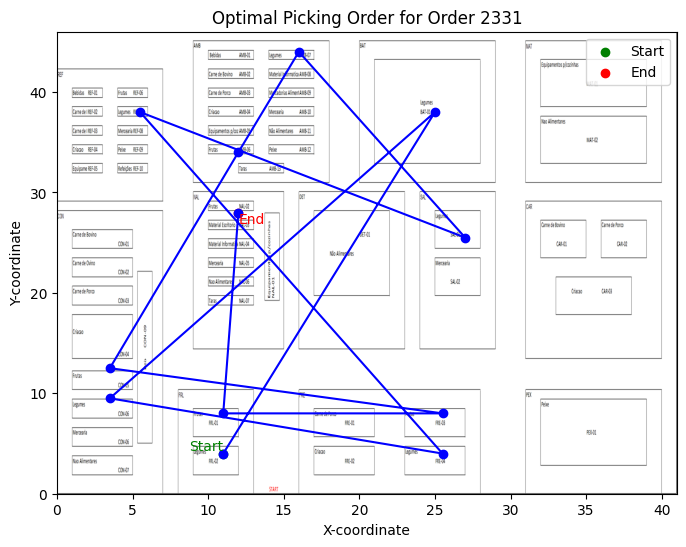

In [234]:
import matplotlib.pyplot as plt

alley_order = optimal_order

# Retrieve the coordinates for each alley in the optimal picking order
alley_coords = []

for alley in alley_order:
    coords = s.loc[s['alley'] == alley, ['x', 'y']].values[0]
    alley_coords.append(coords)

alley_coords = np.array(alley_coords)

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(alley_coords[:, 0], alley_coords[:, 1], marker='o', linestyle='-', color='b')
plt.scatter(alley_coords[0, 0], alley_coords[0, 1], marker='o', color='green', label='Start')
plt.scatter(alley_coords[-1, 0], alley_coords[-1, 1], marker='o', color='red', label='End')

# Load the background image
bg_image = mpimg.imread('Planta.png')  # Replace with your image path


for i, alley_coord in enumerate(alley_coords):
    if i == 0:
        plt.text(alley_coord[0], alley_coord[1], "Start", ha='right', va='bottom', color='green')
    elif i == len(alley_coords) - 1:
        plt.text(alley_coord[0], alley_coord[1], "End", ha='left', va='top', color='red')


plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Optimal Picking Order for Order 2331')
#plt.grid(True)
plt.legend()
plt.imshow(bg_image, aspect='auto', extent=(0, 41, 0, 46))
plt.show()


In [194]:
alley_coords

array([[12. , 34. ],
       [16. , 44. ],
       [25. , 38. ],
       [ 3.5, 12.5],
       [ 3.5,  9.5],
       [25.5,  8. ],
       [25.5,  4. ],
       [11. ,  8. ],
       [11. ,  4. ],
       [ 5.5, 38. ],
       [27. , 25.5]])

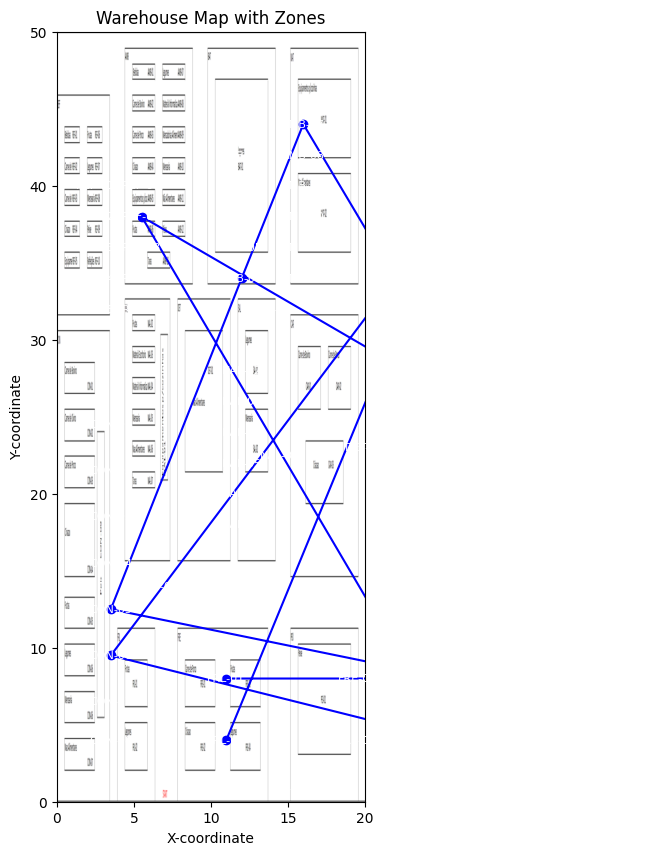

In [198]:
import matplotlib.pyplot as plt

alley_order = ['FRL-02', 'BAT-01', 'CON-06', 'FRE-04', 'REF-07', 'SAL-01', 'AMB-07', 'AMB-06', 'CON-05', 'FRE-03', 'FRL-01']

# Retrieve the coordinates for each alley in the optimal picking order
alley_coords = []

for alley in alley_order:
    coords = s.loc[s['alley'] == alley, ['x', 'y']].values[0]
    alley_coords.append(coords)

alley_coords = np.array(alley_coords)

# Load the warehouse map image
warehouse_img = plt.imread("Planta.png")

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Set the x and y limits based on the coordinate range
ax.set_xlim(0, 20)  # Adjust based on the actual coordinate range
ax.set_ylim(0, 50)  # Adjust based on the actual coordinate range

# Add the warehouse image as the background
ax.imshow(warehouse_img, extent=[0, 20, 0, 50])  # Adjust the extent based on the actual coordinate range

# Create a line plot connecting the zones
ax.plot(alley_coords[:, 0], alley_coords[:, 1], marker='o', linestyle='-', color='blue')

# Add zone labels
for i, zone in s.iterrows():
    ax.text(zone['x'], zone['y'], zone['alley'], ha='center', va='center', color='white', fontsize=8)

# Set the labels and title
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_title('Warehouse Map with Zones')

# Show the plot
plt.show()


In [197]:
alley_coords

array([[12. , 34. ],
       [16. , 44. ],
       [25. , 38. ],
       [ 3.5, 12.5],
       [ 3.5,  9.5],
       [25.5,  8. ],
       [25.5,  4. ],
       [11. ,  8. ],
       [11. ,  4. ],
       [ 5.5, 38. ],
       [27. , 25.5]])